## EE 461P: Data Science Principles  
### Assignment 4 
### Total points: 80
### Due: April 6, 2021 submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline). You can also follow the below steps to embed an image,
* Set cell mode to Markdown
* Drag and drop your image into the cell. The following command will be created:
`![image.png](attachment:image.png)` 
* Execute/Run the cell and the image will be displayed. Once you submit make sure to download the notebook and verify if the image exists.

### Name(s) and EID(s):
1. Simoni Maniar (ssm3256)
2. Julian Fritz (jjf2459)

### Homework group No.: 2


`NOTE : Fill the Name and EID section along with group number without fail.`

In [1]:
# Upgrade scikit learn to the latest version
!pip install --upgrade --user scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\simoni\anaconda3\lib\site-packages (0.24.1)


# Question 1 (Data Imputation and Feature Selection) (15 pts)

In this question, we will explore how to impute missing values in a given dataset and perform feature engineering. 

We will be using the WHO Life Expectancy Data, which measures the life expectancy from health factors for 193 countries collected from the WHO data repository website and its corresponding economic data collected from United Nation website. More information on the dataset can be found [here](https://www.kaggle.com/kumarajarshi/life-expectancy-who).Use the below code to load the dataset, the predictor variable is "Life Expectancy" and the rest are the feature variables. 

`orig_df` contains data from all years except 2014 and `orig_df_2014` contains data from only 2014. 

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import plot_roc_curve 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Load the dataset from csv files
orig_df = pd.read_csv("Life Expectancy Data.csv")
orig_df = orig_df[(orig_df['Life_expectancy'].notna()) & (orig_df['Year'] != 2015)]

# Select only 2014 data
orig_df_2014 = orig_df[orig_df['Year']== 2014]

# Drop the year column
orig_df_2014 = orig_df_2014.drop(columns=["Year"])



* **Part 1** : Report the datatype of the column values in the `orig_df_2014` dataframe, this helps to identify the categorical, numerical feature variables present in the dataset. Drop the categorical columns in the `orig_df_2014` dataset and create a new dataframe with only numerical valued columns and name it `numerical_df_2014`. Print the number of missing values(NaN) for each column in this `numerical_df_2014` dataframe.  **(1 pts)**

* **Part 2** : In this part we will explore different ways to handle missing data, you can make use of the pandas dataframe's function available, refer [here](https://pandas.pydata.org/docs/reference/frame.html).
  
  * a) Create a copy of the numerical_df_2014 dataframe and name it `numerical_df_na_drop_row`. Drop all the NaN rows in `numerical_df_na_drop_row`, then split the dataframe into y(Life_expectancy) which is the predictor variable and the rest as X. Split the dataset using train_test_split with random_state = 42 and train:test split as 70:30. Fit a linear regression model on train data and evaluate the model on the test data by reporting the test ${R^2}$ score. **(2 pts)**

  * b) Next, Create another copy of the numerical_df_2014 dataframe and name it `numerical_df_na_fill_zero`. Now, fill the NaN values with zeros in `numerical_df_na_fill_zero`, then split the dataframe into y(Life_expectancy) which is the predictor variable and the rest as X. Split the dataset using train_test_split with random_state = 42 and train:test split as 70:30. Fit a linear regression model on train data and evaluate the model on the test data by reporting the test ${R^2}$ score.**(2 pts)**

  * c) Finally, Create a copy of the numerical_df_2014 dataframe and name it `numerical_df_na_drop_cols`. Drop all the features(columns) which contain NaN values in `numerical_df_na_drop_cols` then split the dataframe into y(Life_expectancy) which is the predictor variable and the rest as X. Split the dataset using train_test_split with random_state = 42 and train:test split as 70:30. Fit a linear regression model on train data and evaluate the model on the test data by reporting the test ${R^2}$ score.**(2 pts)**

  * d) Compare the test ${R^2}$ score value score obtained in part a), b) and c) explain what you observe in the scores, provide reasoning on which is your preferred method to handle missing data and why? **(2 pts)**

* **Part 3** (Feature selection): In this part we will be using the  `numerical_df_na_drop_row` dataframe created by dropping all NaN samples in part 2a). Split this dataset into train:test split of 70:30 with random_state 42 and use the training data for the sub-parts below:

  * a) Compute the correlation of all the feature variables with the predictor variable(Life_expectancy). Report the five most correlated feature variable with the predictor using training data. (**1pts**)

  * b) Use Linear Regression as an estimator for Recursive Feature Selection. We will use Sequential Feature Selector to perform `forward` feature selection. Details on how to use Sequential Feature Selector is given [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html). Report the top five features selected after performing forward selection using training data.(**2pts**)

  * c) Use Decision Tree Regressor with random_state=20 from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) with default parameters and fit the model on training data. Identify the feature importance from the fitted model and report the 5 most important features. (**1pts**)

  * d) Use the most common set of features obtained from the feature selection methods in part a) b) and c). Train a linear regression model on this subset of features by fitting it on train data and reporting the ${R^2}$ and adjusted ${R^2}$ score on test data. Briefly eplain what you understand by feature selection and how it affects the model performance based on the results obtained.(**2pts**). 

      `NOTE : Most common set of feature indicates most common feature intersection, i.e. features selected using all feature selection methods in part a) b) and c).`

### Solution 1.1

In [3]:
numerical_df_2014 = orig_df_2014.copy()

for i in orig_df_2014.columns:
    print(i + ':', orig_df_2014[i].dtype)
    if orig_df_2014[i].dtype == 'object':
        numerical_df_2014 = numerical_df_2014.drop(i,axis=1)
    
numerical_df_2014.head()

Country: object
Status: object
Life_expectancy: float64
Adult_Mortality: float64
infant_deaths: int64
Alcohol: float64
percentage_expenditure: float64
Hepatitis_B: float64
Measles: int64
BMI: float64
under_five_deaths: int64
Polio: float64
Total_expenditure: float64
Diphtheria: float64
HIV_AIDS: float64
GDP: float64
Population: float64
thinness_1_19_years: float64
thinness_5_9_years: float64
Income_composition_of_resources: float64
Schooling: float64


,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
17,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
33,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
49,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
65,76.2,131.0,0,8.56,2422.999774,99.0,0,47.0,0,96.0,5.54,99.0,0.2,12888.296670,NaN,3.3,3.3,0.782,13.9


In [4]:
#print the number of missing values for each column in 2014
for i in numerical_df_2014.columns:
    print(i+':', numerical_df_2014[i].isna().sum())

Life_expectancy: 0
Adult_Mortality: 0
infant_deaths: 0
Alcohol: 1
percentage_expenditure: 0
Hepatitis_B: 10
Measles: 0
BMI: 2
under_five_deaths: 0
Polio: 0
Total_expenditure: 2
Diphtheria: 0
HIV_AIDS: 0
GDP: 28
Population: 41
thinness_1_19_years: 2
thinness_5_9_years: 2
Income_composition_of_resources: 10
Schooling: 10


### Solution 1.2

In [5]:
# 1.2.a
numerical_df_na_drop_row = numerical_df_2014.copy()
numerical_df_na_drop_row.dropna(axis=0, inplace=True)
print('dropped', numerical_df_2014.shape[0] - numerical_df_na_drop_row.shape[0], 'rows')

y_2014 = numerical_df_na_drop_row['Life_expectancy']
X_2014 = numerical_df_na_drop_row.drop('Life_expectancy',axis=1)
X_train_2014, X_test_2014, y_train_2014, y_test_2014 = train_test_split(X_2014, y_2014, test_size=0.3, random_state=42)

dropped 52 rows


In [6]:
linreg_drop = LinearRegression().fit(X_train_2014, y_train_2014)
print('R^2 score is:', linreg_drop.score(X_test_2014,y_test_2014)) #LinearRegression score uses R2

R^2 score is: 0.8701727711220606


In [7]:
# 1.2.b
numerical_df_na_fill_zero = numerical_df_2014.copy()
numerical_df_na_fill_zero.fillna(value=0, inplace=True)

y_2014 = numerical_df_na_fill_zero['Life_expectancy']
X_2014 = numerical_df_na_fill_zero.drop('Life_expectancy',axis=1)
X_train_2014, X_test_2014, y_train_2014, y_test_2014 = train_test_split(X_2014, y_2014, test_size=0.3, random_state=42)

In [8]:
linreg_fill = LinearRegression().fit(X_train_2014, y_train_2014)
print('R^2 score is:', linreg_fill.score(X_test_2014, y_test_2014)) #LinearRegression score uses R2

R^2 score is: 0.8179646801674404


In [9]:
# 1.2.c
numerical_df_na_drop_cols = numerical_df_2014.copy()
numerical_df_na_drop_cols.dropna(axis=1, inplace=True)
print('dropped', numerical_df_2014.shape[1] - numerical_df_na_drop_cols.shape[1], 'cols')

y_2014 = numerical_df_na_drop_cols['Life_expectancy']
X_2014 = numerical_df_na_drop_cols.drop('Life_expectancy',axis=1)
X_train_2014, X_test_2014, y_train_2014, y_test_2014 = train_test_split(X_2014, y_2014, test_size=0.3, random_state=42)

dropped 10 cols


In [10]:
linreg_dropcol = LinearRegression().fit(X_train_2014, y_train_2014)
print('R^2 score is:', linreg_dropcol.score(X_test_2014, y_test_2014)) #LinearRegression score uses R2

R^2 score is: 0.7023537475768191


1.2.d) Dropping the rows with missing data had the highest R^2 score at 0.870, then filling rows with a score of 0.817, then dropping columns with 0.702. Out of these three options, my preferred way to handle missing data would be to drop rows, but it depends on the data. Data where only one column is missing values but it's missing a lot of values, then it would be smart to just drop that column. But data like this set where dropping columns results in losing most of the features is going to hurt the predictive power of your data. Filling missing data with zeros is a decent option but it can skew the data. A column that was zero-mean would be best for filling missing values with zero. In general however, my preferred method to handle missing data would be to fill the missing values with a mean/median/mode of its feature, or use the k-Nearest-Neighbor algorithm for finding the best value to fill.

### Solution 1.3

In [11]:
numerical_df_na_drop_row = numerical_df_2014.copy()
numerical_df_na_drop_row.dropna(axis=0, inplace=True)
print('dropped', numerical_df_2014.shape[0] - numerical_df_na_drop_row.shape[0], 'rows')

y_2014 = numerical_df_na_drop_row['Life_expectancy']
X_2014 = numerical_df_na_drop_row.drop('Life_expectancy',axis=1)
X_train_2014, X_test_2014, y_train_2014, y_test_2014 = train_test_split(X_2014, y_2014, test_size=0.3, random_state=42)

dropped 52 rows


In [12]:
# 1.3.a
train_combined, dummytest = train_test_split(numerical_df_na_drop_row,test_size=0.3,random_state=42)
corr_matrix = train_combined.corr()
corr_matrix

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
Life_expectancy,1.000000,-0.793102,-0.195053,0.456352,0.409644,0.227618,-0.035850,0.534602,-0.222776,0.302509,0.317548,0.301166,-0.663313,0.453543,-0.037952,-0.372451,-0.410019,0.884442,0.786168
Adult_Mortality,-0.793102,1.000000,0.156231,-0.263692,-0.287232,-0.199859,0.040395,-0.404719,0.181439,-0.254602,-0.164331,-0.222582,0.624627,-0.313840,0.022158,0.246735,0.284775,-0.706643,-0.621257
infant_deaths,-0.195053,0.156231,1.000000,-0.044742,-0.103767,-0.057209,0.690798,-0.206088,0.995573,-0.088632,-0.175904,-0.057068,0.089708,-0.102764,0.860371,0.520461,0.598863,-0.170661,-0.198074
Alcohol,0.456352,-0.263692,-0.044742,1.000000,0.449911,-0.032923,0.109102,0.289271,-0.055413,0.037630,0.326574,0.099286,-0.185373,0.382107,0.023025,-0.321867,-0.328696,0.533650,0.511425
percentage_expenditure,0.409644,-0.287232,-0.103767,0.449911,1.000000,0.081194,-0.081789,0.322299,-0.105577,0.072772,0.339906,0.089483,-0.175240,0.889282,-0.052180,-0.240488,-0.254663,0.481669,0.511526
Hepatitis_B,0.227618,-0.199859,-0.057209,-0.032923,0.081194,1.000000,-0.001594,0.022392,-0.068415,0.714915,0.093203,0.889856,-0.242196,0.120225,-0.023063,0.076299,0.035755,0.160990,0.206307
Measles,-0.035850,0.040395,0.690798,0.109102,-0.081789,-0.001594,1.000000,-0.144472,0.660136,0.007020,-0.116528,-0.003619,-0.072101,-0.050631,0.685410,0.302517,0.400245,-0.017978,-0.049447
BMI,0.534602,-0.404719,-0.206088,0.289271,0.322299,0.022392,-0.144472,1.000000,-0.212341,0.056679,0.184429,0.058935,-0.360509,0.370753,-0.130938,-0.513234,-0.554920,0.609339,0.475702
under_five_deaths,-0.222776,0.181439,0.995573,-0.055413,-0.105577,-0.068415,0.660136,-0.212341,1.000000,-0.105497,-0.180019,-0.071247,0.121061,-0.105686,0.820952,0.492194,0.585501,-0.186697,-0.209497
Polio,0.302509,-0.254602,-0.088632,0.037630,0.072772,0.714915,0.007020,0.056679,-0.105497,1.000000,0.185204,0.804280,-0.224890,0.128262,-0.015965,0.022544,-0.022179,0.284949,0.323122


In [13]:
highest_corr = [0,0,0,0,0]
highest_corridx = [-1,-1,-1,-1,-1]
#find 5 highest
for i in range(len(train_combined.columns)):
    correlation = np.abs(corr_matrix['Life_expectancy'][i])
    if correlation > np.min(highest_corr) and correlation < 1:
        idx = np.argmin(highest_corr)
        highest_corr[idx] = correlation
        highest_corridx[idx] = corr_matrix.columns[i]
    
print(highest_corr)
print(highest_corridx)

[0.7931022073964489, 0.5346023396754936, 0.7861684070826337, 0.8844420102499087, 0.6633128940576278]
['Adult_Mortality', 'BMI', 'Schooling', 'Income_composition_of_resources', 'HIV_AIDS']


In [14]:
#1.3.b
sfs = SequentialFeatureSelector(LinearRegression(),n_features_to_select=5,direction='forward')
sfs.fit(X_train_2014,y_train_2014)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [15]:
boolarray = sfs.get_support()
features = []
for i in range(len(X_train_2014.columns)):
    if boolarray[i]:
        features.append(X_train_2014.columns[i])
        
features

['Adult_Mortality',
 'Alcohol',
 'HIV_AIDS',
 'GDP',
 'Income_composition_of_resources']

In [16]:
#1.3.c
dtc = DecisionTreeRegressor(random_state=20).fit(X_train_2014, y_train_2014)
dtc.feature_importances_

array([1.93932430e-02, 4.38973250e-03, 1.83020948e-02, 1.16492338e-02,
       5.26167019e-04, 2.84490963e-02, 1.22432780e-02, 6.46934932e-02,
       3.55785362e-05, 3.80637628e-03, 9.27677388e-05, 6.28251884e-01,
       4.32081556e-04, 1.63046425e-03, 3.42076930e-03, 1.57769536e-03,
       1.93103427e-01, 8.00261730e-03])

In [17]:
ftrimps = dtc.feature_importances_
highest_imp = [0,0,0,0,0]
highest_imps = ['','','','','']
for i in range(len(ftrimps)):
    ftrimp = ftrimps[i]
    if ftrimp > np.min(highest_imp):
        idx = np.argmin(highest_imp)
        highest_imp[idx] = ftrimp
        highest_imps[idx] = X_train_2014.columns[i]
        
print(highest_imp)
print(highest_imps)

[0.019393242998918436, 0.628251884447212, 0.19310342653742524, 0.06469349324625781, 0.02844909625580568]
['Adult_Mortality', 'HIV_AIDS', 'Income_composition_of_resources', 'under_five_deaths', 'Measles']


In [18]:
# most commonly selected features: Adult_Mortality, HIV_AIDS, and Income_composition_of_resources
X_bestftrs = X_train_2014.drop(['infant_deaths','Alcohol','percentage_expenditure','Hepatitis_B','Measles','under_five_deaths',
                         'Polio', 'Total_expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness_1_19_years',
                         'thinness_5_9_years','Schooling'],axis=1)
X_bestftrs_test = X_test_2014.drop(['infant_deaths','Alcohol','percentage_expenditure','Hepatitis_B','Measles','under_five_deaths',
                         'Polio', 'Total_expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness_1_19_years',
                         'thinness_5_9_years','Schooling'],axis=1)
X_bestftrs.head()

,Adult_Mortality,BMI,HIV_AIDS,Income_composition_of_resources
979,125.0,55.3,0.1,0.759
1443,156.0,6.7,0.1,0.822
2024,214.0,24.8,0.1,0.676
593,23.0,23.7,0.8,0.497
1347,22.0,52.3,0.1,0.789


In [19]:
linreg_bestftrs = LinearRegression().fit(X_bestftrs,y_train_2014)
score = linreg_bestftrs.score(X_bestftrs_test,y_test_2014)
print('R^2 score:', score)
print('R^2 adjusted score:', 1 - (1-score)*(len(y_test_2014)-1)/(len(y_test_2014)-X_bestftrs_test.shape[1]-1))

R^2 score: 0.8614809029751371
R^2 adjusted score: 0.8456501490294386


Feature selection can be useful to obtain a more accurate model, as we see in this example we got the best score using only the 3 best selected features. A linear regressor is a very simple model though and additional features can pretty easily skew the result, so it makes sense that feature selection helps a lot with a linear regression.

# Question 2 (15 pts) - Principal Component Analysis

In this problem we will be applying PCA on the Superconductivity Dataset. More details on the dataset is present [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal here is to predict the critical temperature of a superconductor based on the features extracted.

Use Principal Component Analysis (PCA) to solve this problem.  

* **2.1 (1 pt)** Perform the following steps to prepare the dataset:
    * Load the dataset from the "Q2data.csv" file provided as a dataframe df. 

    * Select the **'critical_temp'** column as the target column and the rest of the columns from the dataframe df as X. 

    * Split the dataset into train and test set with 35% data in test set and random_state = 42

    * Perform [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    `Note: X should have 81 features.`
    
* **2.2 (3 pts)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X_train to the following number of components: `[3,20,40,60,81]`. For each of the five datasets, print the cumulative variance explained by the principal components`N = [3,20,40,60,81]`.(i.e. what percentage of variance in the original dataset is explained if we transform the dataset to have 3,20,40,60 and 81 principal components respectively). 

  `Note : PCA should be fit on X_train and the components thus learnt should be later used to transform X_test`

* **2.3 (4 pts)** Plot the cumulative variance explained by the principal components using the training data. The plot should display the number of components on X-axis and the cumulative explained variance on the y-axis. What do you understand from the plot obtained?

* **2.4 (4 pts)** For each of the reduced dataset, obtained in part 2.2, fit a linear regression model on the train data and report the adjusted ${R^2}$ score on the test dataset. Comment on how the score varies as the number of components increase.(There will be a total of 5 adjusted ${R^2}$ score).

* **2.5 (3 pts)** Visualizing principal components : For this part use a small subset of 50 samples of the training dataset and plot the first three principal components, i.e first plot PC1 vs. PC2 (i.e. the projection of the data onto the 2-D space defined by the first two Principal Components) and also PC2 vs PC3 in both these plot color the projected points according to the corresponding ground truth labels. Do you observe any pattern in the plot?

  `Note : You will have two scatter plots for part 2.4`

# Solution 2

### Solution 2.1

In [20]:
#2.1
df = pd.read_csv('Q2data.csv')
y = df['critical_temp']
X = df.drop('critical_temp', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

### Solution 2.2

In [21]:
#2.2
from sklearn.decomposition import PCA
N = [3,20,40,60,81]
#N = np.arange(3,81,1)
reduced_Xs = []
reduced_Xtests = []
ys = []
for n in N:
    pca = PCA(n_components=n)
    reduced_Xs.append(pca.fit_transform(X_train_s))
    print(pca.explained_variance_ratio_.sum())
    ys.append(pca.explained_variance_ratio_.sum())
    reduced_Xtests.append(pca.transform(X_test_s))

0.5894367932307188
0.969424998724444
0.9961464512117504
0.9995333314100111
0.9999999999999999


### Solution 2.3

Text(0, 0.5, 'Cumulative Explained Variance')

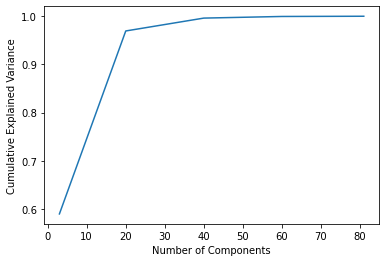

In [22]:
#2.3
import matplotlib.pyplot as plt
plt.plot(N,ys)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

### Solution 2.4

In [23]:
for i in range(len(reduced_Xs)):
    linreg = LinearRegression().fit(reduced_Xs[i],y_train)
    score = linreg.score(reduced_Xtests[i],y_test)
    print("Adjusted R^2 for", N[i], ":", 1 - (1-score)*(len(y_test)-1)/(len(y_test)-reduced_Xtests[i].shape[1]-1))

Adjusted R^2 for 3 : 0.4927514889588822
Adjusted R^2 for 20 : 0.6240423247621445
Adjusted R^2 for 40 : 0.6882631356047282
Adjusted R^2 for 60 : 0.7155758363085698
Adjusted R^2 for 81 : 0.7277522695494444


The score increases as the number of components increases.

### Solution 2.5

In [26]:
# to project 81 dim X onto 2 dim B, we need B*(B^T*B)^-1*B^T*X
# ignore this
#BTBinv = np.linalg.inv( np.dot(pc2X.T,pc2X) )
#print(BTBinv.shape)
#BBTBinv = np.dot(pc2X, BTBinv)
#print(BBTBinv.shape)
#BTX = np.dot(pc2X.T, X_train_50)
#print(BTX.shape)
#proj2D = np.dot( BBTBinv, BTX)
#print(proj2D.shape)


In [27]:
#2.5

print(X_train_s.shape)
#take 50 samples
X_train_50, dummyXtest, y_train_50, dummyYtest = train_test_split(X_train_s, y_train, test_size=13770, random_state=42)
print(y_train_50)

(13820, 81)
10660      2.050
20553      2.850
4802      45.700
17303      0.545
14304     22.600
6156      40.900
9763      23.200
12809      8.800
16790      0.130
16041      7.120
10674     27.300
20746      0.360
7058      21.000
15307      6.260
20113      0.955
16628      6.430
13374      8.400
18443      8.740
8770      32.200
16748      2.800
12263      5.600
19280      8.400
17923      2.440
9069      75.000
13792      5.200
6016      15.400
1103      85.500
5114      34.500
16507      2.660
4893      82.500
18690     26.400
4718      18.000
3881      84.000
15993      4.460
11851      1.300
597       87.000
9866      45.000
17870     34.000
14782     38.400
9007     124.000
14404      4.620
9648      45.000
4055      28.000
258       88.500
4760      90.300
8183       9.000
1081      86.000
13637      5.900
12117     11.250
8761      35.000
Name: critical_temp, dtype: float64


In [28]:
X_colors = []
for i in range(len(y_train_50)):
    if y_train_50.iloc[i] < 5:
        X_colors.append('green')
    elif y_train_50.iloc[i] < 10:
        X_colors.append('yellowgreen')
    elif y_train_50.iloc[i] < 20:
        X_colors.append('yellow')
    elif y_train_50.iloc[i] < 30:
        X_colors.append('orange')
    elif y_train_50.iloc[i] < 50:
        X_colors.append('orangered')
    else: #if y_train_50.iloc[i] < 100:
        X_colors.append('red')
        
print(X_colors)

['green', 'green', 'orangered', 'green', 'orange', 'orangered', 'orange', 'yellowgreen', 'green', 'yellowgreen', 'orange', 'green', 'orange', 'yellowgreen', 'green', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'orangered', 'green', 'yellowgreen', 'yellowgreen', 'green', 'red', 'yellowgreen', 'yellow', 'red', 'orangered', 'green', 'red', 'orange', 'yellow', 'red', 'green', 'green', 'red', 'orangered', 'orangered', 'orangered', 'red', 'green', 'orangered', 'orange', 'red', 'red', 'yellowgreen', 'red', 'yellowgreen', 'yellow', 'orangered']


In [29]:
pc1 = PCA(n_components = 1)
pc2 = PCA(n_components = 2)
pc3 = PCA(n_components = 3)
pc1X = pc1.fit_transform(X_train_50)
pc2X = pc2.fit_transform(X_train_50)
pc3X = pc3.fit_transform(X_train_50)

In [30]:
#print(pc2X)

Text(0, 0.5, 'PC2')

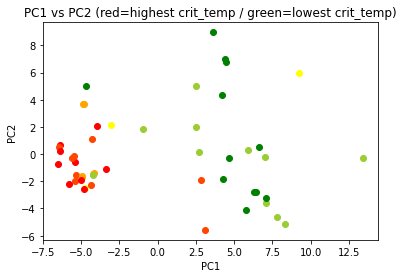

In [31]:
#color according to ground truth labels? So what, each "critical temp" value gets its own colored point on the graph?
# Each point is gonna have a unique crit temp so how is each point gonna have a unique color?
for i in range(len(pc2X)):
    plt.scatter(pc2X[i,0], pc2X[i,1],color=X_colors[i])
plt.title('PC1 vs PC2 (red=highest crit_temp / green=lowest crit_temp)')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC3')

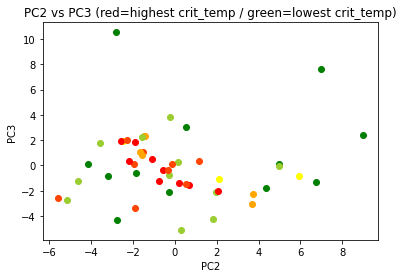

In [32]:
for i in range(len(pc2X)):
    plt.scatter(pc3X[i,1], pc3X[i,2],color=X_colors[i])
plt.title('PC2 vs PC3 (red=highest crit_temp / green=lowest crit_temp)')
plt.xlabel('PC2')
plt.ylabel('PC3')
#plt.legend(['y > 50','30<y<50','20<y<30','10<y<20','5<y<10'])


"Do you observe any pattern in the plots?" Not really. PC1 seems to show a higher y value the more negative PC1 is, but PC2 and PC3 don't appear to have any real correlation with the y value. Both plots don't show a clear correlation between PC1 and PC2 or PC2 and PC3.

# Question 3 - Expected Loss Minimization (15 pts)
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$
where the cost of rejection is a constant. Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ for the following three cases - 
1. c = 0
2. c = 2
3. c = 1

# Answer 3


1. Reject for all ranges of P(C1|X)
2. If P(C1|X) >= 0.6 choose C1. Otherwise, chose C2
3. If P(C1|X) >= 0.666 chose C1. Else, if P(C1|X) >= 0.5 and < 0.666, reject. Else, choose C2.  


With a rejection loss of 0, you want to reject for all ranges.
With a rejection loss of 2, you want to choose C2 from 0:0.6 and chose C1 from 0.6:1.
With a rejection loss of 1, you want to choose C2 from 0:0.5, reject from 0.5 to 0.666, and choose C1 from 0.666 to 1.


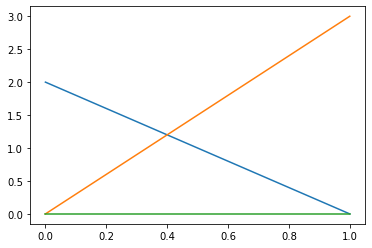

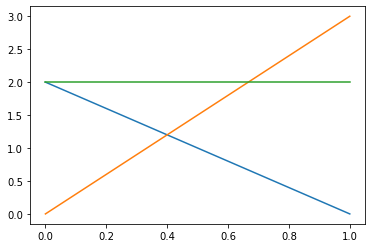

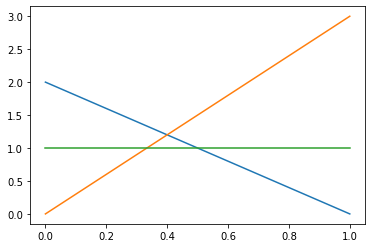

In [5]:
import matplotlib.pyplot as plt
c1 = [2, 0]
c2 = [0, 3]
r1 = [0,0]
r2 = [2,2]
r3 = [1,1]
plt.figure(1)
plt.plot(c1)
plt.plot(c2)
plt.plot(r1)
print("With a rejection loss of 0, you want to reject for all ranges.")
plt.figure(2)
plt.plot(c1)
plt.plot(c2)
plt.plot(r2)
print("With a rejection loss of 2, you want to choose C2 from 0:0.6 and chose C1 from 0.6:1.")
plt.figure(3)
plt.plot(c1)
plt.plot(c2)
plt.plot(r3)
print("With a rejection loss of 1, you want to choose C2 from 0:0.5, reject from 0.5 to 0.666, and choose C1 from 0.666 to 1.")

# Question 4 (20 pts) - Decision Tree Classifier using sklearn

**Customer Eligibility for Deposits**

We will build a Decision Tree classification model to predict if a customer will subscribe or no (yes/no).

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - `age` (numeric)

2 - `job` : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - `marital` : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'primary', 'secondary','tertiary')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `balance`: account balance

7 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

8 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - `contact`: contact communication type (categorical: 'cellular','telephone')

10 - `day_of_month` : 1,2....31

11 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - `previous`: number of contacts performed before this campaign and for this client (numeric)

16 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

# Output variable (desired target):
17 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

**All pre-processing is done where categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [35]:
# Make a copy for parsing
bank_data = bank.copy()

# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,-1.0


In [36]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

a. **(8 pts)** Build decision trees with depths 2, 5, 10, 20 and max depth using gini and entropy criterion; report the train and test errors. Refer to [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn.

b. **(2 pts)** Explain how the train and test accuracy varies as we increase the depth of the tree.

c. **(4 pts)** List the most [important feature](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for the tree with depth=2 and criterion=gini and [plot the tree](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py). Name this tree model as `dt2`.

# Answer 4

In [37]:
# a
from sklearn.metrics import mean_squared_error
arr = np.array([2, 5, 10, 20])
for i in arr:
    y = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(X_train, Y_train).predict(X_train)
    print("MSE with training dataset, entropy criteria, max depth = {} : {}".format(i, mean_squared_error(Y_train, y)))
    y = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(X_train, Y_train).predict(X_test)
    print("MSE with test dataset, entropy criteria, max depth = {} : {}".format(i, mean_squared_error(Y_test, y)))
    y = tree.DecisionTreeClassifier(criterion='gini', max_depth=i).fit(X_train, Y_train).predict(X_train)
    print("MSE with training dataset, gini criteria, max depth = {} : {}".format(i, mean_squared_error(Y_train, y)))
    y= tree.DecisionTreeClassifier(criterion='gini', max_depth=i).fit(X_train, Y_train).predict(X_test)
    print("MSE with test dataset, gini criteria, max depth = {} : {}".format(i, mean_squared_error(Y_test, y)))


MSE with training dataset, entropy criteria, max depth = 2 : 0.2880501735916676
MSE with test dataset, entropy criteria, max depth = 2 : 0.29108822212270485
MSE with training dataset, gini criteria, max depth = 2 : 0.27147496920147834
MSE with test dataset, gini criteria, max depth = 2 : 0.27317510076130763
MSE with training dataset, entropy criteria, max depth = 5 : 0.20013439354910964
MSE with test dataset, entropy criteria, max depth = 5 : 0.22167487684729065
MSE with training dataset, gini criteria, max depth = 5 : 0.20237428603427035
MSE with test dataset, gini criteria, max depth = 5 : 0.2239140170174653
MSE with training dataset, entropy criteria, max depth = 10 : 0.14996080188150968
MSE with test dataset, entropy criteria, max depth = 10 : 0.20824003582624273
MSE with training dataset, gini criteria, max depth = 10 : 0.1367454362190615
MSE with test dataset, gini criteria, max depth = 10 : 0.21137483206448723
MSE with training dataset, entropy criteria, max depth = 20 : 0.03595

In [38]:
# b - 

# ENTROPY MSE with training data set - decreases as depth increases
# ENTROPY MSE with test data set - decreases as depth uncreases until depth = 10, then increases
# GINI MSE with training data set - decreases as depth increases (at a slower rate than ENTROPY)
# GINI MSE with test data set - decreases as depth uncreases until depth = 10, then increases

print("For both criterion, the training data set error continues to decrease as depth increases. \nHowever, since the test data starts to increase after depth = 10, it's likely that we are overfitting and that ~10 features is the optimal modal.")

For both criterion, the training data set error continues to decrease as depth increases. 
However, since the test data starts to increase after depth = 10, it's likely that we are overfitting and that ~10 features is the optimal modal.


In [39]:
# c - finding most important feature
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=2).fit(X_train, Y_train)
print("The most important feature is duration.\n\n\n")
print("List of Feature Importances\n", model.feature_importances_)
print("List of Features\n", X_train.columns.values)

The most important feature is duration.



List of Feature Importances
 [0.         0.         0.84930612 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.15069388
 0.         0.        ]
List of Features
 ['age' 'balance' 'duration' 'campaign' 'previous' 'default_cat'
 'housing_cat' 'loan_cat' 'job_admin.' 'job_blue-collar'
 'job_entrepreneur' 'job_housemaid' 'job_management' 'job_retired'
 'job_self-employed' 'job_services' 'job_student' 'job_technician'
 'job_unemployed' 'job_unknown' 'marital_divorced' 'marital_married'
 'marital_single' 'education_primary' 'education_secondary'
 'education_tertiary' 'education_unknown' 'poutcome_failure'
 'poutcome_other' 'poutcome_success' 'poutcome_unknown' 'recent_pdays']


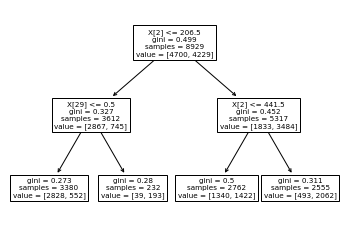

In [40]:
# c - plot
tree.plot_tree(model)
plt.show()